<a href="https://colab.research.google.com/github/marianegri/Python_DataScience_MachineLearning/blob/main/Pre-processamento/Normaliza%C3%A7%C3%A3o_e_Redu%C3%A7%C3%A3o_de_Dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalização
Alguns algoritmos de machine learning precisam que os dados estejam normalizados para que funcionem bem.

Um exemplo de normalização é o '**Standard Scaler**' ou ***estandarização***

### **Standard Scaler**
resultado da estandarização terá:
- Media 0
- Desvio padrão 1

Formula:

$Z = \frac{x - u}{s}$

legenda:

x : valor que queremos normalizar\
u : média dos valores que queremos normalizar\
s : desvio padrão dos valorea que queremos normalizar

# Redução de Dimensionalidade


Descartar variaveis:
- Descartar antes do treino:
  - Base em correlação
  - **Descartar variveis antes da modelagem pode ser uma armadilha**
- Descartar depois do treino/teste:
  - Alguns algoritmos mostram a **relevancia** de cada variavel
  - Importante depois revisitar a variavel para ver se realmente não teve relevancia

Substituir variaveis:
- **PCA**: proposta por Karl Pearson:
  - Encontrar um novo conjunto de variaveis (menor que o conjunto anterior) que contenha a mesma informação
  - Utiliza a **covariancia**


In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exercicio 1
Cartão de Crédito

In [118]:
df_cc = pd.read_csv('CC_DATASET.CSV')
df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [119]:
## Tratamento dos outliers

In [120]:
### Verificar outliers

In [121]:
list(df_cc)

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [122]:
df_cc[['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [123]:
df_cc[['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']].mean()

BALANCE                               1564.474828
BALANCE_FREQUENCY                        0.877271
PURCHASES                           112734.658634
ONEOFF_PURCHASES                       592.437371
INSTALLMENTS_PURCHASES                 411.067645
CASH_ADVANCE                           978.871112
PURCHASES_FREQUENCY                      0.490351
ONEOFF_PURCHASES_FREQUENCY               0.202458
PURCHASES_INSTALLMENTS_FREQUENCY         0.364437
CASH_ADVANCE_FREQUENCY                   0.135144
CASH_ADVANCE_TRX                         3.248827
PURCHASES_TRX                           14.709832
CREDIT_LIMIT                        116236.934644
PAYMENTS                              1733.143852
MINIMUM_PAYMENTS                       864.206542
PRC_FULL_PAYMENT                         0.153715
TENURE                                  11.517318
dtype: float64

In [124]:
df_cc[['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']].max()

BALANCE                             1.904314e+04
BALANCE_FREQUENCY                   1.000000e+00
PURCHASES                           1.000000e+09
ONEOFF_PURCHASES                    4.076125e+04
INSTALLMENTS_PURCHASES              2.250000e+04
CASH_ADVANCE                        4.713721e+04
PURCHASES_FREQUENCY                 1.000000e+00
ONEOFF_PURCHASES_FREQUENCY          1.000000e+00
PURCHASES_INSTALLMENTS_FREQUENCY    1.000000e+00
CASH_ADVANCE_FREQUENCY              1.500000e+00
CASH_ADVANCE_TRX                    1.230000e+02
PURCHASES_TRX                       3.580000e+02
CREDIT_LIMIT                        1.000000e+09
PAYMENTS                            5.072148e+04
MINIMUM_PAYMENTS                    7.640621e+04
PRC_FULL_PAYMENT                    1.000000e+00
TENURE                              1.200000e+01
dtype: float64

In [125]:
df_cc[['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']].min()

BALANCE                              0.000000
BALANCE_FREQUENCY                    0.000000
PURCHASES                            0.000000
ONEOFF_PURCHASES                     0.000000
INSTALLMENTS_PURCHASES               0.000000
CASH_ADVANCE                         0.000000
PURCHASES_FREQUENCY                  0.000000
ONEOFF_PURCHASES_FREQUENCY           0.000000
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000
CASH_ADVANCE_FREQUENCY               0.000000
CASH_ADVANCE_TRX                     0.000000
PURCHASES_TRX                        0.000000
CREDIT_LIMIT                        50.000000
PAYMENTS                             0.000000
MINIMUM_PAYMENTS                     0.019163
PRC_FULL_PAYMENT                     0.000000
TENURE                               6.000000
dtype: float64

In [126]:
## Sobrescrevendo outliers pela mediana

In [127]:
for i in df_cc.drop(['CUST_ID'], axis=1):   # axis = 1 mostra que quero tirar uma coluna
  df_cc[i] = np.where((df_cc[i] <= df_cc[i].quantile(0.001)) 
                            | (df_cc[i] > df_cc[i].quantile(0.999)),

                             ((df_cc[i] > df_cc[i].quantile(0.001)) 
                            & (df_cc[i] < df_cc[i].quantile(0.999))).mean(),

                              df_cc[i])

In [128]:
df_cc[['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']].mean()

BALANCE                             1548.014340
BALANCE_FREQUENCY                      0.879926
PURCHASES                            969.923517
ONEOFF_PURCHASES                     561.956545
INSTALLMENTS_PURCHASES               396.976652
CASH_ADVANCE                         951.787637
PURCHASES_FREQUENCY                    0.610963
ONEOFF_PURCHASES_FREQUENCY             0.426251
PURCHASES_INSTALLMENTS_FREQUENCY       0.545470
CASH_ADVANCE_FREQUENCY                 0.382308
CASH_ADVANCE_TRX                       3.398052
PURCHASES_TRX                         14.577662
CREDIT_LIMIT                        4469.711263
PAYMENTS                            1693.304707
MINIMUM_PAYMENTS                     814.336473
PRC_FULL_PAYMENT                       0.342295
TENURE                                11.383518
dtype: float64

**Valores ausente**\
Nesse contexto (cartão de crédito) as ausências devem ser legítimas, ou seja, não existe
informação mesmo. Portanto, **trate as ausências com zero**.

In [129]:
for i in df_cc.drop(['CUST_ID'], axis = 1):
  df_cc[i].fillna(value=0, inplace =True)
df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.400000,0.518324,95.400000,0.481899,0.166667,0.465587,0.083333,0.479218,0.481899,2.000000,1000.0,201.802084,139.509787,0.285922,12.0
1,C10002,3202.467416,0.909091,0.770615,0.518324,0.561453,6442.945483,0.528380,0.465587,0.413855,0.250000,4.000000,0.770615,7000.0,4103.032597,1072.340217,0.222222,12.0
2,C10003,2495.148862,1.000000,773.170000,773.170000,0.561453,0.481899,1.000000,1.000000,0.413855,0.479218,0.481899,12.000000,7500.0,622.066742,627.284787,0.285922,12.0
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,0.561453,205.788017,0.083333,0.083333,0.413855,0.083333,1.000000,1.000000,7500.0,0.972179,0.000000,0.285922,12.0
4,C10005,817.714335,1.000000,16.000000,16.000000,0.561453,0.481899,0.083333,0.083333,0.413855,0.479218,0.481899,1.000000,1200.0,678.334763,244.791237,0.285922,12.0


**Normalização**:\
O dataset é praticamente
todo composto por variáveis numéricas. Aplique a normalização *Standard Scaler* sobre essas variáveis numéricas

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
estadCC = StandardScaler()

In [132]:
estadCC.fit(df_cc.drop(['CUST_ID'], axis = 1))

StandardScaler()

In [133]:
valEstadCC = estadCC.transform(df_cc.drop(['CUST_ID'], axis = 1 ))

In [134]:
dfCC_stard = pd.DataFrame(valEstadCC, columns = df_cc.drop(['CUST_ID'], axis = 1 ).columns)

In [135]:
dfCC_stard.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.743230,-0.270145,-0.476327,-0.417524,-0.384546,-0.497943,-1.464978,0.171691,-1.770322,0.561204,-0.491378,-0.548552,-0.968007,-0.567532,-0.371061,-0.263049,0.306905
1,0.815891,0.127602,-0.527869,-0.417524,-0.505476,2.874243,-0.272301,0.171691,-0.504182,-0.766188,0.101429,-0.602170,0.706160,0.916926,0.164467,-0.560285,0.306905
2,0.467078,0.525348,-0.107166,0.157073,-0.505476,-0.497943,1.282773,2.504314,-0.504182,0.561204,-0.491378,-0.112420,0.845674,-0.407617,-0.091035,-0.263049,0.306905
3,0.058515,-1.065637,0.288172,0.696850,-0.505476,-0.390479,-1.739755,-1.496780,-0.504182,-1.731351,-0.404077,-0.592165,0.845674,-0.643950,-0.451152,-0.263049,0.306905
4,-0.360146,0.525348,-0.519574,-0.406011,-0.505476,-0.497943,-1.739755,-1.496780,-0.504182,0.561204,-0.491378,-0.592165,-0.912201,-0.386206,-0.310620,-0.263049,0.306905


# Modelagem

1. Aplique K-means sobre os dados separando em
2 clusters (k=2) e grave o resultado no df
original

In [136]:
from sklearn.cluster import KMeans

In [137]:
# Cluster em 2 grupos
cluster_cc_k2 = KMeans(n_clusters = 2)

# Fitando o modelo utilizando os dados normalizados 
cluster_cc_k2.fit(X = dfCC_stard)

# labels de cada grupo 0 ou 1
cluster_cc_k2.labels_

# Adicionar uma coluna para as labels
df_cc['CLUSTER_K2'] = pd.DataFrame(cluster_cc_k2.labels_).values

In [138]:
df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER_K2
0,C10001,40.900749,0.818182,95.400000,0.518324,95.400000,0.481899,0.166667,0.465587,0.083333,0.479218,0.481899,2.000000,1000.0,201.802084,139.509787,0.285922,12.0,1
1,C10002,3202.467416,0.909091,0.770615,0.518324,0.561453,6442.945483,0.528380,0.465587,0.413855,0.250000,4.000000,0.770615,7000.0,4103.032597,1072.340217,0.222222,12.0,1
2,C10003,2495.148862,1.000000,773.170000,773.170000,0.561453,0.481899,1.000000,1.000000,0.413855,0.479218,0.481899,12.000000,7500.0,622.066742,627.284787,0.285922,12.0,0
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,0.561453,205.788017,0.083333,0.083333,0.413855,0.083333,1.000000,1.000000,7500.0,0.972179,0.000000,0.285922,12.0,1
4,C10005,817.714335,1.000000,16.000000,16.000000,0.561453,0.481899,0.083333,0.083333,0.413855,0.479218,0.481899,1.000000,1200.0,678.334763,244.791237,0.285922,12.0,1


In [139]:
## Fazendo o mesmo para k=3, ou seja, 3 grupos, para comparar
# Cluster em 2 grupos
cluster_cc_k3 = KMeans(n_clusters = 3)

# Fitando o modelo utilizando os dados normalizados 
cluster_cc_k3.fit(X = dfCC_stard)

# labels de cada grupo 0 ou 1
cluster_cc_k3.labels_

# Adicionar uma coluna para as labels
df_cc['CLUSTER_K3'] = pd.DataFrame(cluster_cc_k3.labels_).values

In [140]:
df_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER_K2,CLUSTER_K3
0,C10001,40.900749,0.818182,95.400000,0.518324,95.400000,0.481899,0.166667,0.465587,0.083333,0.479218,0.481899,2.000000,1000.0,201.802084,139.509787,0.285922,12.0,1,0
1,C10002,3202.467416,0.909091,0.770615,0.518324,0.561453,6442.945483,0.528380,0.465587,0.413855,0.250000,4.000000,0.770615,7000.0,4103.032597,1072.340217,0.222222,12.0,1,2
2,C10003,2495.148862,1.000000,773.170000,773.170000,0.561453,0.481899,1.000000,1.000000,0.413855,0.479218,0.481899,12.000000,7500.0,622.066742,627.284787,0.285922,12.0,0,1
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,0.561453,205.788017,0.083333,0.083333,0.413855,0.083333,1.000000,1.000000,7500.0,0.972179,0.000000,0.285922,12.0,1,0
4,C10005,817.714335,1.000000,16.000000,16.000000,0.561453,0.481899,0.083333,0.083333,0.413855,0.479218,0.481899,1.000000,1200.0,678.334763,244.791237,0.285922,12.0,1,0


In [141]:
df_cc['CLUSTER_K3'].unique()

array([0, 2, 1], dtype=int32)

Análise de dados:
1. Escolha duas métricas e plote um gráfico de dispersão,
separando
por cor os pontos da
clusterização k=2.
2. Repita o gráfico da questão anterior para k3. Visualmente qual a clusterização ficou melhor?

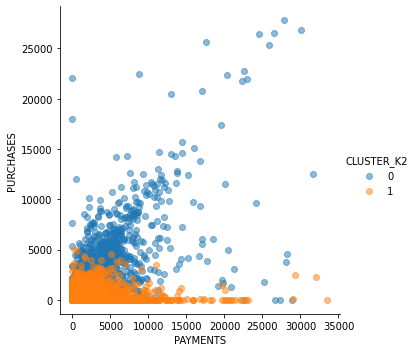

In [142]:
# Plotando a dispersão de k2
sns.lmplot(x='PAYMENTS', y = 'PURCHASES', data = df_cc, hue='CLUSTER_K2', fit_reg=False, scatter_kws={'alpha':0.5})

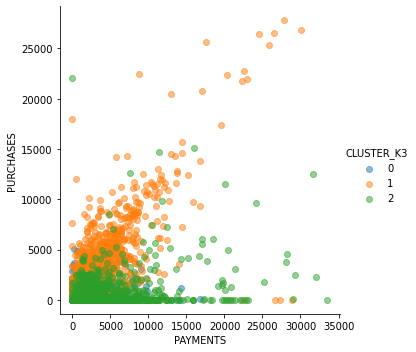

In [143]:
# Plotando a dispersão de k3
sns.lmplot(x='PAYMENTS', y = 'PURCHASES', data = df_cc, hue='CLUSTER_K3', fit_reg=False, scatter_kws={'alpha':0.5})

3. Quantos casos ficaram
enquadrados
em cada cluster em cada uma das clusterizações?

In [151]:
df_cc.groupby('CLUSTER_K2')['CUST_ID'].count()

CLUSTER_K2
0    3142
1    5808
Name: CUST_ID, dtype: int64

In [152]:
df_cc.groupby('CLUSTER_K3')['CUST_ID'].count()

CLUSTER_K3
0    4928
1    2917
2    1105
Name: CUST_ID, dtype: int64